Ví dụ A.1.

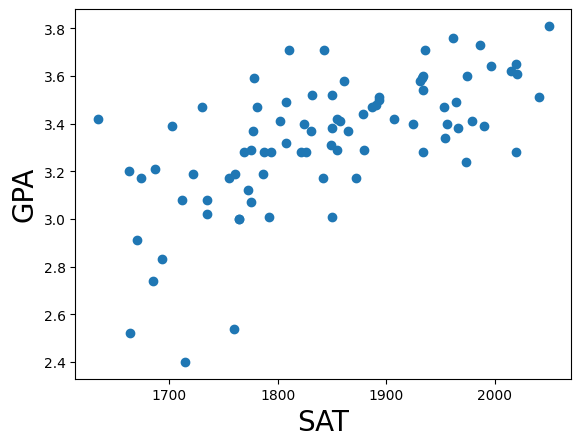

In [166]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

data = \
pd.read_csv("/Users/nguyencongtri/PycharmProjects/MachineLearning/Lab3/SAT_GPA.csv")
# Show the description of data
data.describe()
# Set to training data (x, y)
y = data['GPA']
x = data['SAT']
# Remind that we need to put component x_0 = 1 to x
plt.scatter(x,y)
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

In [167]:
X_train,X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [168]:
k = 8
def distance(array, value):
    array = np.array(array)
    return abs(array - value)
def find_nearest_index(array, value, k):
    array_D = distance(array, value)
    return np.argsort(array_D)[:k]
data_len = len(x)
X_train = X_train.to_numpy()
Y_train = Y_train.to_numpy()
X_test = X_test.to_numpy()
Y_test = Y_test.to_numpy()
k = 8

Y_pred = np.zeros(len(X_test))
for i in range(len(X_test)):
    indexis = find_nearest_index(X_train, X_test[i], k)
    for id in indexis:
        Y_pred[i] = Y_pred[i] + Y_train[id]
    Y_pred[i] = Y_pred[i]/len(indexis)
    print(Y_pred[i], ' | ', Y_test[i])

3.4675000000000002  |  3.6
3.1775  |  2.4
3.24  |  3.47
3.0549999999999997  |  3.2
3.08  |  3.08
3.4674999999999994  |  3.59
3.08  |  3.02
3.3874999999999997  |  3.17
3.02625  |  2.83
3.36875  |  3.52
3.3474999999999997  |  3.37
3.4987500000000002  |  3.4
3.4250000000000003  |  3.31
3.4887499999999996  |  3.73
3.4200000000000004  |  3.47
3.42  |  3.44
3.4000000000000004  |  3.29


In [169]:
from sklearn.metrics import  mean_squared_error,mean_absolute_error, r2_score
MSE = mean_squared_error(Y_test,Y_pred)
MAE = mean_absolute_error(Y_test,Y_pred)
R2 = r2_score(Y_test,Y_pred)

print("MSE:", MSE)
print("MAE:", MAE)
print("R²:", R2)


MSE: 0.05411617647058829
MAE: 0.15823529411764722
R²: 0.45301636099103193


Ví dụ A.2.


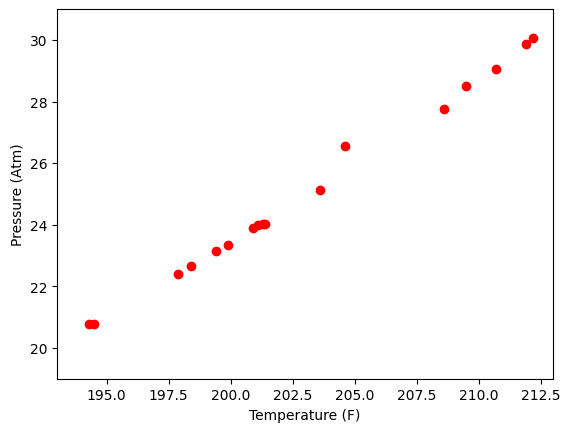

In [170]:
from __future__ import division, print_function, unicode_literals
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

# Temp (F degree)
x = np.array([[194.5, 194.3, 197.9, 198.4, 199.4, 199.9, 200.9, 201.1, 201.4, 201.3, 203.6, 204.6, 209.5, 208.6, 210.7, 211.9, 212.2]]).T
# Press (Atm)
y = np.array([[20.79,20.79,22.4,22.67,23.15,23.35,23.89,23.99,24.02,24.01,25.14,26.57,28.49,27.76,29.04,29.88,30.06]]).T
# Visualize data
plt.plot(x, y, 'ro')
plt.axis([193, 213, 19, 31])
plt.xlabel('Temperature (F)')
plt.ylabel('Pressure (Atm)')
plt.show()

In [171]:
x,y = shuffle(x,y,random_state=42)

In [172]:
k = 4
def distance(array, value):
    array = np.array(array)
    return abs(array-value)
def find_nearest_index(array, value, k):
    array_D = distance(array, value)
    return np.argsort(array_D)[:k]
data_len = len(x)
X_train = x[:12,0]
Y_train = y[:12,0]
X_test = x[12:,0]
Y_test = y[12:,0]
k = 4
Y_pred = np.zeros(len(X_test))
for i in range(len(X_test)):
    indexis = find_nearest_index(X_train, X_test[i], k)
    for id in indexis:
        Y_pred[i] = Y_pred[i] + Y_train[id]
    Y_pred[i] = Y_pred[i]/len(indexis)
    print(Y_pred[i], ' | ', Y_test[i])

23.6325  |  23.99
24.487500000000004  |  25.14
29.185  |  28.49
23.227500000000003  |  22.67
23.6325  |  23.89


In [173]:
from sklearn.metrics import  mean_squared_error,mean_absolute_error, r2_score
MSE = mean_squared_error(Y_test,Y_pred)
MAE = mean_absolute_error(Y_test,Y_pred)
R2 = r2_score(Y_test,Y_pred)

print("MSE:", MSE)
print("MAE:", MAE)
print("R²:", R2)

MSE: 0.2827399999999991
MAE: 0.5039999999999992
R²: 0.9284069132881471


Ví dụ A.3.


In [174]:
import math
import numpy as np
with open('/Users/nguyencongtri/PycharmProjects/MachineLearning/Lab3/fuel.txt') as f:
    lines = f.readlines()

x_data = []
y_data = []
lines.pop(0)

for line in lines:
    splitted = line.replace('\n', '').split(',')
    splitted.pop(0)
    splitted = list(map(float, splitted))
    fuel = 1000 * splitted[1] / splitted[5]
    dlic = 1000 * splitted[0] / splitted[5]
    logMiles = math.log2(splitted[3])
    y_data.append([fuel])
    x_data.append([splitted[-1], dlic, splitted[2], logMiles])

x_data = np.asarray(x_data)
y_data = np.asarray(y_data)

In [175]:
X_train,X_test, Y_train, Y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

In [176]:
k = 6
def distance(array, value):
    array = np.array(array)
    return np.linalg.norm(array - value, ord = 2, axis=1)
def find_nearest_index(array, value, k):
    array_D = distance(array, value)
    return np.argsort(array_D)[:k]
data_len = len(x)

k = 6
Y_pred = np.zeros(len(X_test))
for i in range(len(X_test)):
    indexis = find_nearest_index(X_train, X_test[i], k)
    for id in indexis:
        Y_pred[i] = Y_pred[i] + Y_train[id]
    Y_pred[i] = Y_pred[i]/len(indexis)
    print(Y_pred[i], ' | ', Y_test[i])

593.9982581914134  |  [681.10013659]
643.3705772613878  |  [711.73305769]
596.349815963148  |  [681.03112144]
643.3705772613878  |  [628.42794733]
633.594722997224  |  [683.50195471]
633.594722997224  |  [646.52727397]
643.3705772613878  |  [659.74131389]
578.8123680341866  |  [374.16406957]
633.594722997224  |  [655.29266793]
553.2111465510183  |  [597.64026149]
625.8648868268192  |  [526.23766215]


/var/folders/2p/p4mj443j4j56m0lgzq98w6qc0000gp/T/ipykernel_89444/1931943996.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Y_pred[i] = Y_pred[i] + Y_train[id]


In [177]:
from sklearn.metrics import  mean_squared_error,mean_absolute_error, r2_score
MSE = mean_squared_error(Y_test,Y_pred)
MAE = mean_absolute_error(Y_test,Y_pred)
R2 = r2_score(Y_test,Y_pred)

print("MSE:", MSE)
print("MAE:", MAE)
print("R²:", R2)

MSE: 6984.692030703815
MAE: 64.06376332499165
R²: 0.17538888808401687


Ví dụ B.1.

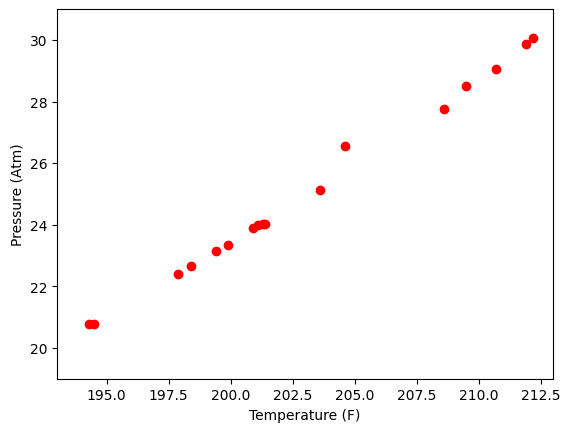

In [178]:
from __future__ import division, print_function, unicode_literals
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

x = np.array([[194.5, 194.3, 197.9, 198.4, 199.4, 199.9, 200.9, 201.1, 201.4, 201.3, 203.6, 204.6, 209.5, 208.6, 210.7, 211.9, 212.2]]).T
y = np.array([[20.79,20.79,22.4,22.67,23.15,23.35,23.89,23.99,24.02,24.01,25.14,26.57,28.49,27.76,29.04,29.88,30.06]]).T
plt.plot(x, y, 'ro')
plt.axis([193, 213, 19, 31])
plt.xlabel('Temperature (F)')
plt.ylabel('Pressure (Atm)')
plt.show()

θ0 = -81.0637271341368
θ1 = 0.5228924008116557
Phương trình hồi quy: y = -81.0637 + 0.5229x


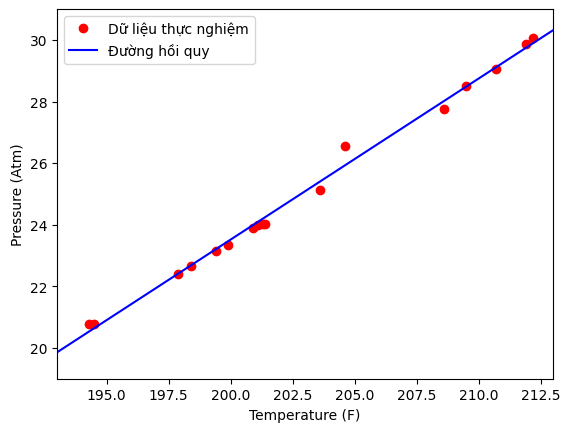

In [179]:
# TÍNH HỒI QUY THEO CÔNG THỨC MA TRẬN
one = np.ones((x.shape[0], 1))
Xbar = np.concatenate((one, x), axis=1)
A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y)
w = np.dot(np.linalg.pinv(A), b)

w_0 = w[0][0]   
w_1 = w[1][0]  

print("θ0 =", w_0)
print("θ1 =", w_1)
print("Phương trình hồi quy: y = {:.4f} + {:.4f}x".format(w_0, w_1))

x0 = np.linspace(193, 213, 2)
y0 = w_0 + w_1 * x0

plt.plot(x, y, 'ro', label="Dữ liệu thực nghiệm")
plt.plot(x0, y0, 'b-', label="Đường hồi quy")
plt.axis([193, 213, 19, 31])
plt.xlabel('Temperature (F)')
plt.ylabel('Pressure (Atm)')
plt.legend()
plt.show()


Ví dụ B.2.

In [180]:
import math
import numpy as np
with open('/Users/nguyencongtri/PycharmProjects/MachineLearning/Lab3/fuel.txt') as f:
    lines = f.readlines()

x_data = []
y_data = []
lines.pop(0)

for line in lines:
    splitted = line.replace('\n', '').split(',')
    splitted.pop(0)
    splitted = list(map(float, splitted))
    fuel = 1000 * splitted[1] / splitted[5]
    dlic = 1000 * splitted[0] / splitted[5]
    logMiles = math.log2(splitted[3])
    y_data.append([fuel])
    x_data.append([splitted[-1], dlic, splitted[2], logMiles])

x_data = np.asarray(x_data)
y_data = np.asarray(y_data)

In [181]:
X_train,X_test, Y_train, Y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)


In [182]:
import numpy as np
import math

# Hàm QR decomposition dùng Householder
def qr_householder(A):
    M = A.shape[0]
    N = A.shape[1]

    Q = np.identity(M)
    R = np.copy(A)

    for n in range(N):
        
        x = A[n:, n]     
        k = x.shape[0]
        ro = -np.sign(x[0]) * np.linalg.norm(x)
        e = np.zeros(k)
        e[0] = 1
        v = (1 / (x[0] - ro)) * (x - (ro * e))

        for i in range(N):
            R[n:, i] = R[n:, i] - (2 / (v @ v)) * ((np.outer(v, v)) @ R[n:, i])

        for i in range(M):
            Q[n:, i] = Q[n:, i] - (2 / (v @ v)) * ((np.outer(v, v)) @ Q[n:, i])

    return Q.transpose(), R

def linear_regression(x_data, y_data):
    x_bars = np.concatenate((np.ones((x_data.shape[0], 1)), x_data), axis=1)
    Q, R = qr_householder(x_bars)
    R_pinv = np.linalg.pinv(R)
    A = np.dot(R_pinv, Q.T)

    return np.dot(A, y_data)


In [183]:
w = linear_regression(x_data, y_data) 
w = w.T.tolist()

line = ['Intercept', 'Tax', "Dlic", "Income", 'LogMiles']
res = list(zip(line, w[0]))
for o in res:
    print("{: >20}: {: >10}".format(*o))

           Intercept: 154.1928445773062
                 Tax: -4.2279832083296
                Dlic: 0.4718712134419832
              Income: -0.0061353309704175974
            LogMiles: 18.54527450604805


b) Trường hợp sử dụng thư viện Scikit-Learn

In [184]:
import math
import numpy as np
from sklearn import linear_model

# Đọc dữ liệu
with open('/Users/nguyencongtri/PycharmProjects/MachineLearning/Lab3/fuel.txt') as f:
    lines = f.readlines()

x_data = []
y_data = []
lines.pop(0)  

for line in lines:
    splitted = line.replace('\n', '').split(',')
    splitted.pop(0)  
    splitted = list(map(float, splitted))

    fuel = 1000 * splitted[1] / splitted[5]
    dlic = 1000 * splitted[0] / splitted[5]
    logMiles = math.log2(splitted[3])

    y_data.append(fuel)
    x_data.append([splitted[-1], dlic, splitted[2], logMiles])  

X = np.array(x_data)
y = np.array(y_data)

Xbar = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)

regr = linear_model.LinearRegression(fit_intercept=False)
regr.fit(Xbar, y)

coef = regr.coef_.ravel()
names = ["Intercept", "Tax", "Dlic", "Income", "LogMiles"]

print("Kết quả hồi quy (Scikit-Learn):")
for name, value in zip(names, coef):
    print(f"{name:>10}: {value}")


Kết quả hồi quy (Scikit-Learn):
 Intercept: 154.19284457734153
       Tax: -4.227983208329625
      Dlic: 0.4718712134419777
    Income: -0.006135330970417604
  LogMiles: 18.545274506048028


Bài tập B.1.


In [185]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

np.random.seed(0)
X = np.random.rand(50, 1) * 10
y = 3 * X.squeeze() + 5 + np.random.randn(50) * 2


X_train, y_train = X[:40], y[:40]
X_val, y_val = X[40:], y[40:]

# Huấn luyện
model = LinearRegression()
model.fit(X_train, y_train)

# Dự đoán
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

# Đánh giá
def evaluate(y_true, y_pred, name):
    print(f"\n--- {name} ---")
    print("MSE :", mean_squared_error(y_true, y_pred))
    print("MAE :", mean_absolute_error(y_true, y_pred))
    print("R2  :", r2_score(y_true, y_pred))

evaluate(y_train, y_train_pred, "Training")
evaluate(y_val, y_val_pred, "Validation")



--- Training ---
MSE : 2.6832686761386806
MAE : 1.3142532807461005
R2  : 0.9613733154469528

--- Validation ---
MSE : 6.9443028956555555
MAE : 2.2819882356144157
R2  : 0.8496039983407607


Ví dụ B.3 (Bài tập tự thực hành 1)

Pearson correlation: 0.6371843648401911
Hồi quy tuyến tính: GPA = 0.0013 * SAT + 0.8382


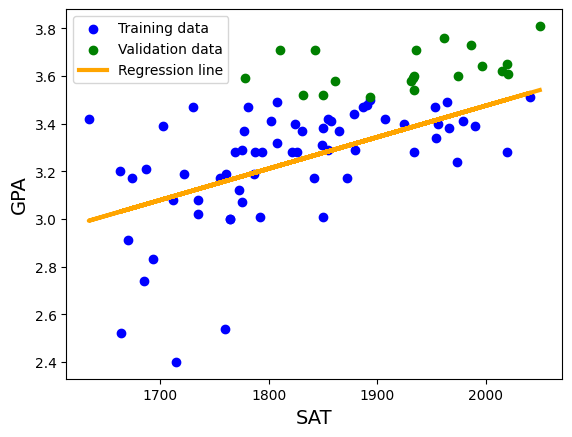


--- Training ---
MSE : 0.04035102091539898
MAE : 0.14677748789915865
R2  : 0.291344312886858

--- Validation ---
MSE : 0.07263824293181356
MAE : 0.24880371695218736
R2  : -9.667975169894785

--- Validation (KNN, k=8) ---
MSE : 0.08137789062499998
MAE : 0.2711875
R2  : -10.951518670142459


In [186]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

data = pd.read_csv("/Users/nguyencongtri/PycharmProjects/MachineLearning/Lab3/SAT_GPA.csv")
X = data['SAT'].values
y = data['GPA'].values

r, pval = pearsonr(X, y)
print("Pearson correlation:", r)

# Chia training / validation
X_train, y_train = X[:64], y[:64]
X_val, y_val     = X[64:], y[64:]

# Tính hệ số hồi quy theo công thức
x_mean, y_mean = np.mean(X_train), np.mean(y_train)
theta1 = np.sum((X_train - x_mean) * (y_train - y_mean)) / np.sum((X_train - x_mean)**2)
theta0 = y_mean - theta1 * x_mean

print(f"Hồi quy tuyến tính: GPA = {theta1:.4f} * SAT + {theta0:.4f}")


plt.scatter(X_train, y_train, color='blue', label="Training data")
plt.scatter(X_val, y_val, color='green', label="Validation data")
yhat_line = theta1*X + theta0
plt.plot(X, yhat_line, lw=3, c='orange', label='Regression line')
plt.xlabel('SAT', fontsize=14)
plt.ylabel('GPA', fontsize=14)
plt.legend()
plt.show()

# Dự đoán và đánh giá
y_train_pred = theta1*X_train + theta0
y_val_pred   = theta1*X_val + theta0

def evaluate(y_true, y_pred, name):
    print(f"\n--- {name} ---")
    print("MSE :", mean_squared_error(y_true, y_pred))
    print("MAE :", mean_absolute_error(y_true, y_pred))
    print("R2  :", r2_score(y_true, y_pred))

evaluate(y_train, y_train_pred, "Training")
evaluate(y_val, y_val_pred, "Validation")

# KNN k=8
def distance(array, value):
    return abs(array - value)

def find_nearest_index(array, value, k):
    array_D = distance(array, value)
    return np.argsort(array_D)[:k]

X_train_knn, Y_train_knn = X_train, y_train
X_test_knn, Y_test_knn   = X_val, y_val
k = 8
Y_pred_knn = np.zeros(len(X_test_knn))

for i in range(len(X_test_knn)):
    idx = find_nearest_index(X_train_knn, X_test_knn[i], k)
    Y_pred_knn[i] = np.mean(Y_train_knn[idx])

evaluate(Y_test_knn, Y_pred_knn, "Validation (KNN, k=8)")




Ví dụ B.4 (Bài tập 2)

In [187]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


cols = ["ID", "TUOI", "BMI", "HA", "GLUCOSE", "CHOLESTEROL", "BEDAYNTM"]
data = pd.read_csv("/Users/nguyencongtri/PycharmProjects/MachineLearning/Lab3/vidu4_lin_reg.txt", sep="\s+", names=cols, header=0)

X = data[["TUOI", "CHOLESTEROL", "GLUCOSE", "HA", "BMI"]]
y = data["BEDAYNTM"]

model_all = LinearRegression()
model_all.fit(X, y)

print("a) Mô hình toàn bộ dữ liệu:")
print("Hệ số intercept (β0):", model_all.intercept_)
print("Hệ số (β1...β5):", model_all.coef_)

train = data.iloc[:80]
test = data.iloc[80:]

X_train = train[["TUOI", "CHOLESTEROL", "GLUCOSE", "HA", "BMI"]]
y_train = train["BEDAYNTM"]

X_test = test[["TUOI", "CHOLESTEROL", "GLUCOSE", "HA", "BMI"]]
y_test = test["BEDAYNTM"]

model_split = LinearRegression()
model_split.fit(X_train, y_train)

y_pred = model_split.predict(X_test)

errors = y_test - y_pred
mean_error = np.mean(errors)
var_error = np.var(errors)

print("\nb) Mô hình train/test:")
print("Hệ số intercept (β0):", model_split.intercept_)
print("Hệ số (β1...β5):", model_split.coef_)
print("Kỳ vọng sai số (Mean error):", mean_error)
print("Phương sai sai số (Variance error):", var_error)

# Nếu cần thêm đánh giá
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))



a) Mô hình toàn bộ dữ liệu:
Hệ số intercept (β0): -0.108029081193868
Hệ số (β1...β5): [ 0.00994694  0.03847025  0.0076701   0.00218137 -0.00020655]

b) Mô hình train/test:
Hệ số intercept (β0): 0.04306436410329706
Hệ số (β1...β5): [ 0.0089892   0.00708535  0.00808634  0.00260218 -0.00047742]
Kỳ vọng sai số (Mean error): 0.07998861696197077
Phương sai sai số (Variance error): 0.22100281283267012
MSE: 0.22740099167615896
MAE: 0.30532598337436595
R2: 0.21453893938640367


Ví dụ B.5 (Bài tập 3).

In [188]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

data = pd.read_csv("/Users/nguyencongtri/PycharmProjects/MachineLearning/Lab3/real_estate.csv")

data = data.drop("No", axis=1)

data["year"] = data["X1 transaction date"].astype(int)

X = data[["year",
          "X2 house age",
          "X3 distance to the nearest MRT station",
          "X4 number of convenience stores",
          "X6 longitude"]]

y = data["Y house price of unit area"]

X_train, y_train = X.iloc[:350], y.iloc[:350]
X_val, y_val = X.iloc[350:], y.iloc[350:]

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_val)
sse_lr = np.sum((y_val - y_pred_lr) ** 2)

print("SSE Linear Regression:", sse_lr)

# KNN (K=18)
knn_model = KNeighborsRegressor(n_neighbors=18)
knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_val)
sse_knn = np.sum((y_val - y_pred_knn) ** 2)

print("SSE KNN (K=18):", sse_knn)


SSE Linear Regression: 3748.729847938872
SSE KNN (K=18): 2808.053641975308
